# **Decision Tree**
In this code I have used Decision Tree Model to Predict whether a female will get breast cancer or not.

In [58]:
#Importing Required Libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

np.set_printoptions(precision=4, linewidth=100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
data = load_breast_cancer()
df = pd.DataFrame(data = data['data'], columns = data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp. & splitting the data for training and testing
X = df.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [62]:
#Applying Model
clf = DecisionTreeClassifier(ccp_alpha = 0.01)
clf = clf.fit(X_train, y_train)

In [63]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [64]:
#Making Prediciton
predict = clf.predict(X_test)
predict

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0])

In [65]:
clf.predict_proba(X_test)

array([[0.    , 1.    ],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.9912, 0.0088],
       [0.8947, 0.1053],
       [0.0256, 0.9744],
       [0.8947, 0.1053],
       [0.0256, 0.9744],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.9912, 0.0088],
       [0.0256, 0.9744],
       [0.0256, 0.9744],


In [66]:
 #Checking Accuracy
 accuracy_score(y_test, predict)

0.9468085106382979

In [67]:
confusion_matrix(y_test, predict, labels = [0, 1])

array([[ 68,   5],
       [  5, 110]])

In [68]:
recall_score(y_test, predict)

0.9565217391304348

In [69]:
print(classification_report(y_test, predict, target_names = ['malignant', 'begnign']))

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        73
     begnign       0.96      0.96      0.96       115

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



In [70]:
#Checking Important Features
feature_nm = X.columns
feature_nm

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [71]:
#Showing the imp features
clf.feature_importances_

array([0.    , 0.0365, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.7922, 0.0469,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.1243, 0.    , 0.    ])

In [72]:
feature_imp = pd.DataFrame(clf.feature_importances_, index = feature_nm).sort_values(0, ascending = False)
feature_imp

,0
worst radius,0.792245
worst concave points,0.124332
worst texture,0.046930
mean texture,0.036493
mean radius,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000
worst area,0.000000


In [73]:
feature = list(feature_imp[feature_imp[0] > 0].index)
feature

['worst radius', 'worst concave points', 'worst texture', 'mean texture']

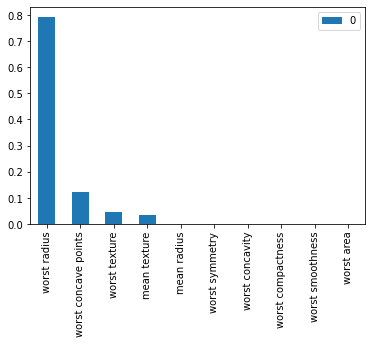

In [74]:
feature_imp.head(10).plot(kind = 'bar')

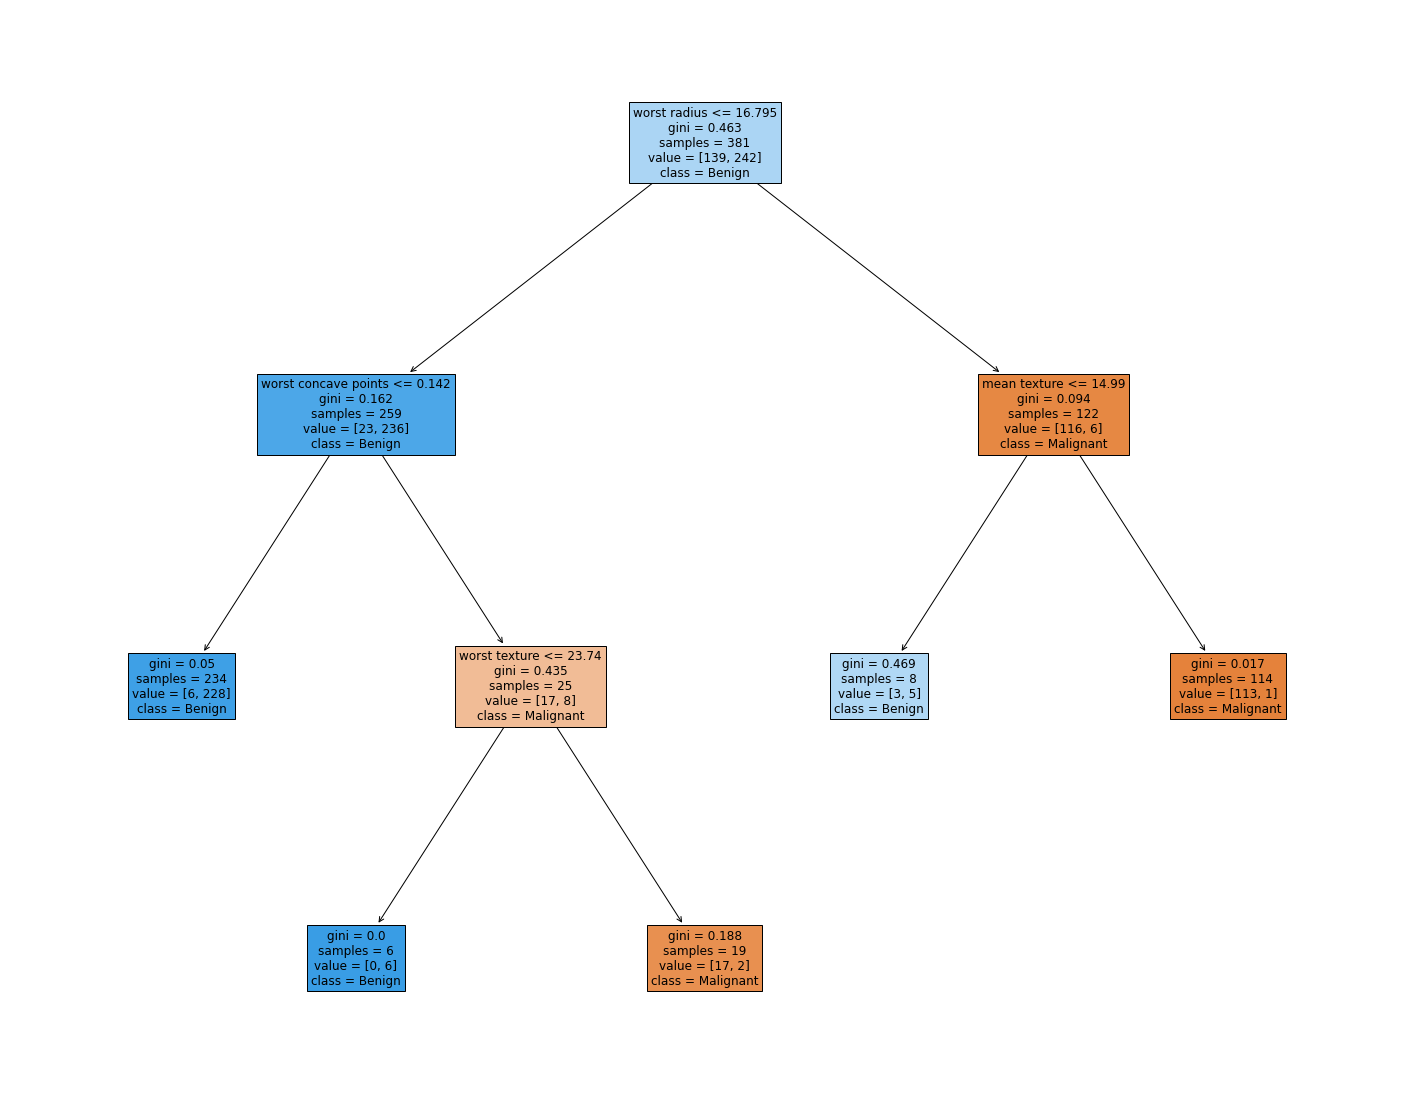

In [75]:
#Decision Tree Plot
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf, feature_names = feature_nm, class_names = {0 : 'Malignant', 1 : 'Benign'}, filled = True, fontsize = 12)